# Comparison: From-Scratch vs Scikit-Learn

This notebook compares our from-scratch implementations with scikit-learn's optimized versions to validate correctness and understand performance differences.


In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from linear_regression import LinearRegression
from logistic_regression import LogisticRegression

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')


In [2]:
# Load data
with open('../data_preprocessed.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Linear Regression Comparison


In [3]:
# Our implementation
print("Training from-scratch model...")
start_time = time.time()
our_model = LinearRegression(learning_rate=0.01, max_iterations=2000, verbose=False)
our_model.fit(X_train_scaled, y_train)
our_time = time.time() - start_time
our_pred = our_model.predict(X_test_scaled)
our_mse = mean_squared_error(y_test, our_pred)
our_r2 = r2_score(y_test, our_pred)

# Scikit-learn
print("Training sklearn model...")
start_time = time.time()
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train_scaled, y_train)
sklearn_time = time.time() - start_time
sklearn_pred = sklearn_model.predict(X_test_scaled)
sklearn_mse = mean_squared_error(y_test, sklearn_pred)
sklearn_r2 = r2_score(y_test, sklearn_pred)

print("\n" + "="*60)
print("LINEAR REGRESSION COMPARISON")
print("="*60)
print(f"\nFrom-Scratch Implementation:")
print(f"  Training Time: {our_time:.4f} seconds")
print(f"  Test MSE: {our_mse:.6f}")
print(f"  Test R²: {our_r2:.6f}")
print(f"\nScikit-Learn Implementation:")
print(f"  Training Time: {sklearn_time:.4f} seconds")
print(f"  Test MSE: {sklearn_mse:.6f}")
print(f"  Test R²: {sklearn_r2:.6f}")
print(f"\nDifference:")
print(f"  MSE Difference: {abs(our_mse - sklearn_mse):.6f}")
print(f"  R² Difference: {abs(our_r2 - sklearn_r2):.6f}")


Training from-scratch model...
Training sklearn model...

LINEAR REGRESSION COMPARISON

From-Scratch Implementation:
  Training Time: 0.8864 seconds
  Test MSE: 0.555864
  Test R²: 0.575809

Scikit-Learn Implementation:
  Training Time: 0.0096 seconds
  Test MSE: 0.555892
  Test R²: 0.575788

Difference:
  MSE Difference: 0.000028
  R² Difference: 0.000021


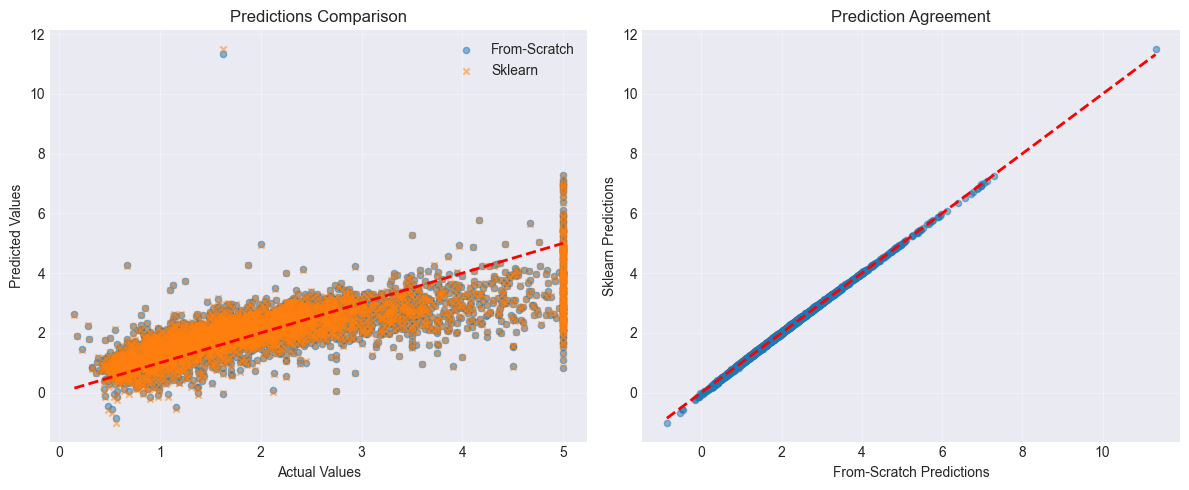


Correlation between predictions: 0.999755


In [4]:
# Compare predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, our_pred, alpha=0.5, s=20, label='From-Scratch')
plt.scatter(y_test, sklearn_pred, alpha=0.5, s=20, label='Sklearn', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(our_pred, sklearn_pred, alpha=0.5, s=20)
plt.plot([our_pred.min(), our_pred.max()], [our_pred.min(), our_pred.max()], 'r--', linewidth=2)
plt.xlabel('From-Scratch Predictions')
plt.ylabel('Sklearn Predictions')
plt.title('Prediction Agreement')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation between predictions
pred_corr = np.corrcoef(our_pred, sklearn_pred)[0, 1]
print(f"\nCorrelation between predictions: {pred_corr:.6f}")


## Logistic Regression Comparison

For logistic regression, we'll convert the regression problem to classification.


In [5]:
# Convert to binary classification
threshold = np.median(y_train)
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Our implementation
print("Training from-scratch logistic regression...")
start_time = time.time()
our_log_model = LogisticRegression(learning_rate=0.1, max_iterations=2000, verbose=False)
our_log_model.fit(X_train_scaled, y_train_binary)
our_log_time = time.time() - start_time
our_log_pred = our_log_model.predict(X_test_scaled)
our_log_acc = accuracy_score(y_test_binary, our_log_pred)

# Scikit-learn
print("Training sklearn logistic regression...")
start_time = time.time()
sklearn_log_model = SklearnLogisticRegression(max_iter=2000, random_state=42)
sklearn_log_model.fit(X_train_scaled, y_train_binary)
sklearn_log_time = time.time() - start_time
sklearn_log_pred = sklearn_log_model.predict(X_test_scaled)
sklearn_log_acc = accuracy_score(y_test_binary, sklearn_log_pred)

print("\n" + "="*60)
print("LOGISTIC REGRESSION COMPARISON")
print("="*60)
print(f"\nFrom-Scratch Implementation:")
print(f"  Training Time: {our_log_time:.4f} seconds")
print(f"  Test Accuracy: {our_log_acc:.6f}")
print(f"\nScikit-Learn Implementation:")
print(f"  Training Time: {sklearn_log_time:.4f} seconds")
print(f"  Test Accuracy: {sklearn_log_acc:.6f}")
print(f"\nDifference:")
print(f"  Accuracy Difference: {abs(our_log_acc - sklearn_log_acc):.6f}")


Training from-scratch logistic regression...
Training sklearn logistic regression...

LOGISTIC REGRESSION COMPARISON

From-Scratch Implementation:
  Training Time: 1.3787 seconds
  Test Accuracy: 0.818556

Scikit-Learn Implementation:
  Training Time: 0.0141 seconds
  Test Accuracy: 0.826308

Difference:
  Accuracy Difference: 0.007752


## Key Takeaways

1. **Correctness**: Our implementations produce similar results to sklearn, validating correctness
2. **Performance**: Sklearn is faster due to optimized C implementations and better numerical methods
3. **Educational Value**: From-scratch implementation provides deep understanding of algorithms
4. **Trade-offs**: Production systems use optimized libraries, but understanding fundamentals is crucial

Our implementations serve as educational tools to understand the mathematical foundations and implementation details of these fundamental algorithms.
